<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Decision-Tree/DT_HeartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Attack Analysis and Prediction using Decision Tree Model**

**Context:**

The Heart Attack Analysis & Prediction Dataset is used for research and analysis in the field of cardiovascular health. It typically contains various attributes related to an individual's health and lifestyle, along with an indicator of whether the individual experienced a heart attack or not.


**Objective:**

* To develop a predictive model using the Decision Tree algorithm to assess the risk of heart attacks based on an individual's health and lifestyle factors.
* The model aims to identify key attributes contributing to heart attack risk and provide insights for early detection and preventive measures.
* This will be achieved by training and evaluating a Decision Tree model on the Heart Attack Analysis & Prediction Dataset, optimizing its performance, and interpreting its results to understand the underlying relationships between risk factors and heart attack outcomes.

**Data Dictionary:**


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

#Importing all necessary libraries

In [15]:
import pandas as pd   # for data manipulation
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To check the performance of the model
from sklearn import metrics

#for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Loading dataset

In [3]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Checking the number of rows and columns
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 303
Columns: 14


**Checking datatypes**


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observations:**
All the columns are in correct data type format.

**Checking the null values**

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


**Observations:**
There are no null values in the dataset


**Checking Duplicate values

In [7]:
df.duplicated().sum()

np.int64(1)

**There is one duplicate value in the dataset.**

**Dropping Duplicates**



In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

**Now there are no duplicate values**

#Summary statistics

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Observations:**

* For the age column we can observe that mean and median is almost same, implying that the distribution of the data is symmetric.


**Checking Correlation**

<Axes: >

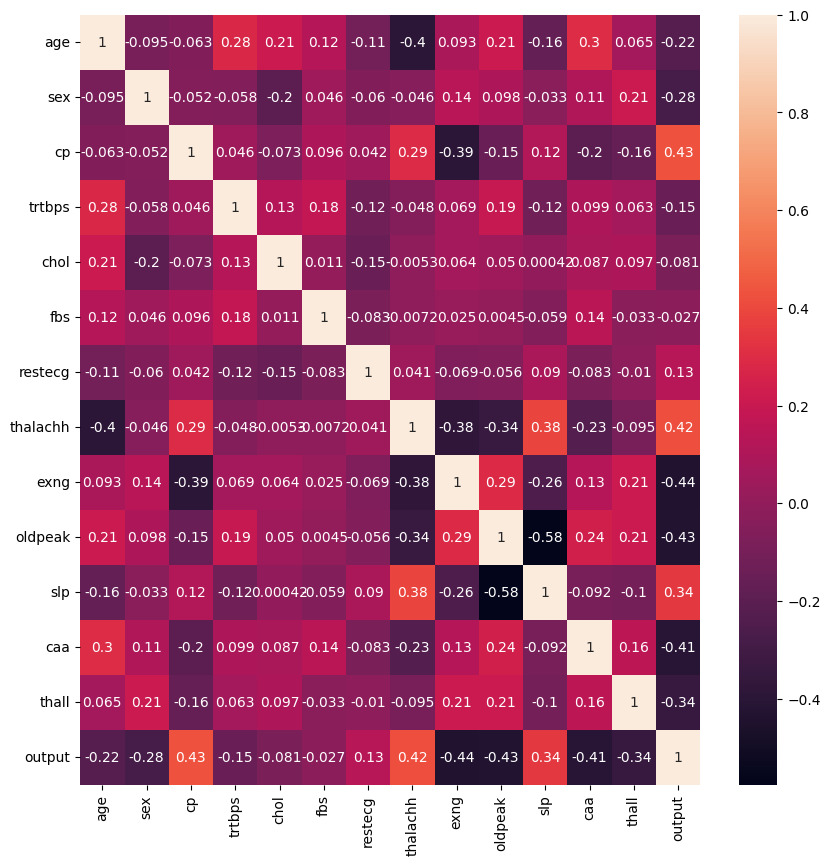

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**Observations:**

* From the heatmap we can observe cp.thalachh and slp are moderately positively correlated.
* slp and oldpeak are negatively correlated.
* we can see, output has negative correlation with exng,oldpeak,caa and thall.
* we can see that age and sex columns has weak negative correlation with output.

#**Data Preparation**

**Separating the input features and output.**

In [13]:
X=df.drop('output',axis=1)
y=df['output']

#Performing feature Scaling

In [16]:
scaling =StandardScaler()
Scaled_X=scaling.fit_transform(X)

#Splitting the data into training and testing data

In [17]:
X_train,X_test,y_train,y_test=train_test_split(Scaled_X,y,test_size=0.2,random_state=5)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((241, 13), (61, 13), (241,), (61,))

#Building the DecisionTreeclassifier model with entropy as criterion.

In [20]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)


#Training the model
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Taking predictions from model

In [21]:
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

#Evaluting the performance of the model

In [22]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 0.86
Training Precision : 0.87
Training Recall : 0.86
Training F1 Score : 0.86

Testing Accuracy : 0.79
Testing Precision : 0.79
Testing Recall : 0.79
Testing F1 Score : 0.79


**Observations:**
* We can see that the model is slightly overfitting.


#Hyperparameter tunning using GridSearchCV() to optimize the model performance

In [23]:
# GridSearchCV()
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}



In [24]:
# Using GridSearchCV
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [25]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [26]:
# Creating the Optimal Model
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 7, min_samples_split = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

**Taking predictions from optimized model**

In [27]:
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [28]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 0.85
Training Precision : 0.87
Training Recall : 0.85
Training F1 Score : 0.85

Testing Accuracy : 0.8
Testing Precision : 0.81
Testing Recall : 0.8
Testing F1 Score : 0.8


**Observations:**
* We can observe that the model performance on testing data is improved but the Decision tree model is still overfitting.

Hyperparameter tunning using RandomizedSearchCV() to optimize the model performance

In [29]:
# RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV

# Creating a parameter dictionary
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

In [30]:
# Fitting the RandomizedSearchCV()
clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator = clf, param_distributions = params, cv = 5, verbose = 1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   verbose=1)

In [31]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [32]:
# Creating the Optimal Model
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 7, min_samples_split = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

In [33]:
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [34]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 0.85
Training Precision : 0.87
Training Recall : 0.85
Training F1 Score : 0.85

Testing Accuracy : 0.8
Testing Precision : 0.81
Testing Recall : 0.8
Testing F1 Score : 0.8


**Observation**
The model is slightly overfitting.

#Conclusion

* The Decision Tree model accurately predicts heart attack risk with 80% accuracy on new data.

* It identifies key risk factors, enabling early detection and preventive measures.

* The model provides valuable insights for informed decision-making in healthcare.E

* While some overfitting exists, it shows promise for real-world application.

* Further refinement can enhance performance and predictive power.

* This model offers a valuable tool for assessing and preventing heart attack risk, aligning with the project's goal.